# 💻 Using pandas for Better (and Worse) Data Science
---
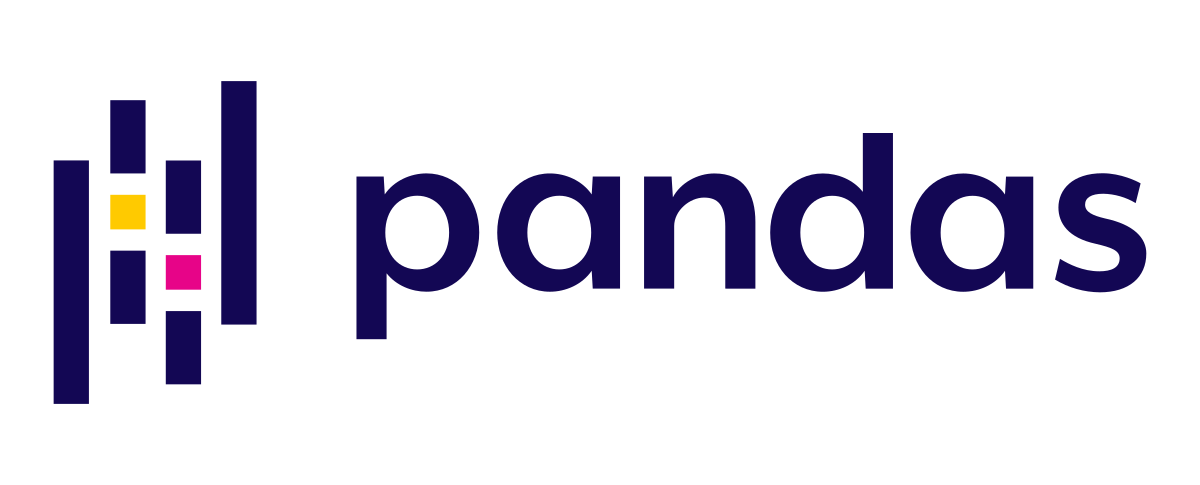

## 📝 Good data analysis project is all about asking questions, in this notebook we are goinig to answer the following questions:
> 1. Do men or women speed more often?
> 2. Does gender affect who gets searched during a stop?
> 3. During a search, how often is the driver frisked?
> 4. Which year had the least number of stops?
> 5. How does drug activity change by time of day?
> 6. Do most stops occur at night?
---

## 📂 Dataset: Stanford Open Policing Project  
> ### 🚔 [Stanford Open Policing Project ](https://openpolicing.stanford.edu/)

In [ ]:
!pip install -q hvplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [ ]:
df = pd.read_csv("../input/stanford-open-policing-project/police_project.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

✔️ **What does NaN mean?**

> In computing, NaN, standing for not a number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic. 


✔️ **Why might a value be missing?**

> There are many causes of missing values, Missing data can occur because of `nonresponse`, `Attrition`, `governments or private entities`, ...

✔️ **Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?**

> We mark missing values as `NaN` to make them distinguish from the original dtype of the feature.

`county_name`  All the data is missing, We will `drop` this column.

# ❌ Remove the column that only contains missing values

In [ ]:
for column in df.columns:
    missing = df[column].isna().sum() / df.shape[0]
    print(f"{column:{20}}: ==============> {missing * 100:.2f}%")

In [ ]:
df.dropna(axis=1, how='all').shape

In [ ]:
df.drop('county_name', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

## 📌 **Lessons:**

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

# 🚔 Do men or women speed more often?

In [ ]:
df.driver_gender.value_counts()

In [ ]:
df.driver_gender.value_counts(normalize=True)

In [ ]:
df['violation'].value_counts()

In [ ]:
df['violation'].value_counts(normalize=True)

In [ ]:
speed_violation = df[df.violation == 'Speeding']

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x='driver_gender', data=df)
plt.title('Men & Women Distribution')

plt.subplot(122)
sns.countplot(x='driver_gender', data=speed_violation)
plt.title('Men & Women Distribution (Violation = Speeding)')

### 📌 Note:
> Responding to this question, we must take consideration of the non-equivalent distribution of the data or use fraction.

In [ ]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

In [ ]:
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

In [ ]:
df[df.violation == 'Speeding'].driver_gender.value_counts().hvplot.bar(height=350, width=350)

In [ ]:
df['violation'].value_counts().hvplot.barh()

In [ ]:
men = df.loc[df['driver_gender']=='F', 'violation'].value_counts().hvplot.barh(alpha=0.3) 
women = df.loc[df['driver_gender']=='M', 'violation'].value_counts().hvplot.barh(alpha=0.3)

women * men

In [ ]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
df[df.violation == 'Speeding'].driver_gender.value_counts().plot(kind="bar")
plt.title("Speeding violation for Men and Women", fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.title("Violation for Men and Women", fontsize=15)
plt.xticks(rotation=90);

In [ ]:
df.loc[df.violation == "Speeding", "driver_gender"].value_counts(normalize=True)

## 🚨 When a man is pulled over, How often is it for speeding?

In [ ]:
print(df[df.driver_gender == "M"].violation.value_counts())

print(df[df.driver_gender == "M"].violation.value_counts(normalize=True))

## 🚨 When a women is pulled over, How often is it for speeding?

In [ ]:
print(df[df.driver_gender == "F"].violation.value_counts())

print(df[df.driver_gender == "F"].violation.value_counts(normalize=True))

In [ ]:
sns.countplot(y='violation', data=df, hue='driver_gender', orient='h')
plt.title("Violation vs Driver Gender Distribution")
# plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(4, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

plt.subplot(4, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

plt.subplot(4, 2, 3)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.xticks(rotation=90)

plt.tight_layout();

# 🔍 Does gender affect who gets searched during a stop?

In [ ]:
print(df.search_conducted.value_counts())

print(df.search_conducted.value_counts(normalize=True))

From all `88545` stoping cases the data only `3196` are searched.

In [ ]:
df.loc[df.search_conducted, 'driver_gender'].value_counts()

In [ ]:
df.loc[df.search_conducted, 'driver_gender'].value_counts(normalize=True)

From the stopped cases `2725` are `men` and only `471` are women.

In [ ]:
searched = df.loc[df['search_conducted']==True, 'driver_gender'].value_counts().hvplot.barh(alpha=0.3) 
not_searched = df.loc[df['search_conducted']==False, 'driver_gender'].value_counts().hvplot.barh(alpha=0.3)

searched * not_searched

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='search_conducted', hue='driver_gender', data=df)
plt.title("Searched Conducted (3196-3%| True)/(88545-97%| False)")

plt.subplot(2, 2, 2)
searched = df[df['search_conducted']==True]
sns.countplot(x='driver_gender', data=searched)
plt.title("Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)")

In [ ]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.search_conducted.value_counts().plot(kind="bar")
plt.title("Searched Cases")

plt.subplot(2, 2, 2)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 3)
df.groupby(['violation', 'driver_gender']).search_conducted.mean().plot(kind="bar")

plt.subplot(2, 2, 4)
sns.countplot(x='search_conducted', data=df, hue='driver_gender')

### 📌**Lessons:**
Does this prove causation?

> - Causation is difficult to conclude, so focus on relationships
> - Include all relevant factors when studying a relationship

# 🔍 Why is search_type missing so often?

In [ ]:
df.search_type.isnull().sum()

In [ ]:
df.search_conducted.value_counts()

In [ ]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)

`search_type` is missing every time the police don't conduct a search.

In [ ]:
df.search_type.value_counts()

In [ ]:
df.search_type.value_counts().hvplot.barh()

### 📌 **Lessons:**

> - Verify your assumptions about your data
> - pandas functions ignore missing values by default

# 🔍 During a search, how often is the driver frisked?

In [ ]:
df.search_type.value_counts()

In [ ]:
from collections import Counter

st = df.search_type.dropna()

search_count = Counter()
for search in st.str.split(','):
    search_count.update(search)

In [ ]:
dict(search_count)

In [ ]:
search_count_dict = dict(search_count)
pd.DataFrame(search_count_dict.items(), columns=['Search Type', 'Count']).hvplot.barh(x='Search Type', y='Count')

In [ ]:
df.search_type.str.contains('Protective Frisk').sum()

In [ ]:
df.search_type.str.contains('Protective Frisk').mean()

`8.57%` of the time the driver is frisked.

### 📌 **Lessons:**

> - Use string methods to find partial matches
> - Use the correct denominator when calculating rates
> - pandas calculations ignore missing values
> - Apply the "smell test" to your results

# 📅 Which year had the least number of stops?

In [ ]:
df.head()

In [ ]:
print(df.stop_date.dtype)
print(df.stop_time.dtype)

In [ ]:
df.stop_date

In [ ]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df["year"] = df.stop_date.dt.year

In [ ]:
df.dtypes

In [ ]:
df.year.value_counts()

In [ ]:
df.year.value_counts().hvplot.barh()

### 📌 **Lessons:**

> - Consider removing chunks of data that may be biased
> - Use the datetime data type for dates and times

# ⏰ How does drug activity change by time of day?

In [ ]:
df.columns

In [ ]:
df.drugs_related_stop.value_counts()

In [ ]:
df["stop_time"] = pd.to_datetime(df.stop_time, format="%H:%M").dt.hour
df.head()

In [ ]:
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts()

In [ ]:
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().hvplot(kind="bar", height=300, width=450)
)

In [ ]:
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().hvplot(height=300, width=450)
)

### 📌 **Lessons:**

> - Use plots to help you understand trends
> - Create exploratory plots using pandas one-liners

# 🌆 Do most stops occur at night?

In [ ]:
df.stop_time.sort_index().value_counts().sort_index()

In [ ]:
df.stop_time.sort_index().value_counts().sort_index().hvplot(height=300, width=450)

In [ ]:
df.stop_time.sort_index().value_counts().sort_index().hvplot(kind="bar")

### 📌 **Lessons:**

> - Be conscious of sorting when plotting

# ⏱ Find the bad data in the stop_duration column and fix it 

In [ ]:
df.stop_duration.isnull().sum()

In [ ]:
df.stop_duration.unique()

In [ ]:
df.stop_duration.value_counts(dropna=False)

In [ ]:
# ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)
df.loc[(df.stop_duration == '1')| (df.stop_duration == '2'), 'stop_duration'] = np.nan

In [ ]:
df.stop_duration.value_counts(dropna=False)

### 📌 **Lessons:**

> - Ambiguous data should be marked as missing
> - NaN is not a string

# ⌛️ What is the mean stop_duration for each violation_raw?

In [ ]:
df.stop_duration.unique()

In [ ]:
df.violation_raw.value_counts()

In [ ]:
df.groupby('stop_duration').violation_raw.value_counts()

In [ ]:
df['violation_raw'].value_counts().hvplot.barh()

In [ ]:
df['stop_duration'].value_counts().hvplot.barh()

In [ ]:
sns.catplot(x="stop_duration", data=df, hue="violation_raw", kind="count")

In [ ]:
plt.figure(figsize=(7, 7))
df.groupby('stop_duration').violation_raw.value_counts().plot(kind="barh")

In [ ]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)

In [ ]:
df.stop_minutes.value_counts()

In [ ]:
df.groupby('violation_raw').stop_minutes.mean()

In [ ]:
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

In [ ]:
df.groupby('violation_raw').stop_minutes.mean().hvplot(rot=45, height=500)

In [ ]:
df.groupby('violation_raw').stop_minutes.mean().hvplot(kind="bar", rot=45, height=500)

### 📌 **Lessons:**

> - Convert strings to numbers for analysis
> - Approximate when necessary
> - Use count with mean to looking for meaningless means

# 👴🏿🧔🏿Compare the age distributions for each violation

In [ ]:
df.groupby("violation").driver_age.describe()

In [ ]:
df.hvplot.hist(y='driver_age', height=300, width=450)

In [ ]:
df.hvplot.kde(y='driver_age', height=300, width=450)

In [ ]:
df.hvplot.hist(y='driver_age', by='violation', height=300, width=500)

In [ ]:
df.hvplot.hist(y='driver_age', by='violation', subplots=True, height=300, width=300).cols(3)

### 📌 **Lessons:**

> - Use histograms to show distributions
> - Be conscious of axes when using grouped plots